In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Leer el dataset

In [6]:
df = pd.read_csv("Data/Titanic-Dataset.csv", index_col="PassengerId") #index col enumera la fila usando el nombre exacto de la ID
df.head()#Mostrar resultados del df(DATAFRAME)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Informacion del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe() #sacar minimo,maximo,desviacion estandar,porcentaje,etc

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Duplicados y nulos

In [6]:
duplicados = df.duplicated().sum()
if duplicados > 0:
    print(f"Se encontraron {duplicados} filas duplicadas. Procediendo a eliminarlas")
    df.drop_duplicates(inplace=True)
else:
    print("No se encontraron duplicados, no es necesario eliminarlas")
print("Dimensiones tras el paso de duplicados", df.shape)

No se encontraron duplicados, no es necesario eliminarlas
Dimensiones tras el paso de duplicados (891, 11)


In [7]:
nulos_columnas = df.isnull().sum() #isnull solo identifica los nulos
nulos_filas = df[df.isnull().any(axis=1)]
total_nulos =  nulos_columnas.sum()

In [8]:
nulos_columnas

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
nulos_filas

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [10]:
total_nulos

np.int64(866)

### Dropna es para eliminar nulos y isnull para verificar nulos

In [ ]:
#Imputar y eliminar nulos
if nulos_columnas["Age"] > 0:
    df["Age"] = df["Age"].fillna(df["Age"].median())
    print("Reemplazar nulos por la mediana")
else:
    print("No hay valores nulos")
    if nulos_columnas["Embarked"] > 0:
        df.dropna(subset=["Embarked"], inplace=True)
        print("Limpieza de nulos completada")
    else:
        print("No hay valores nulos")
    
    if nulos_columnas["Survived"] > 0:
        df.dropna(subset=["Survived"], inplace=True)
        print("Limpieza de nulos completada")
    else:
        print("No hay valores nulos")

Reemplazar nulos por la mediana


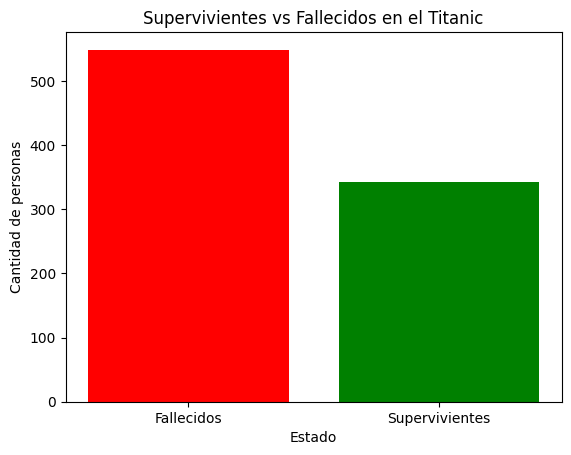

In [ ]:
# Contar supervivientes y fallecidos
conteo = df["Survived"].value_counts().sort_index()
labels = ['Fallecidos', 'Supervivientes']

plt.bar(labels, conteo, color=['red', 'green'])
plt.title('Supervivientes vs Fallecidos en el Titanic')
plt.ylabel('Cantidad de personas')
plt.xlabel('Estado')
plt.show()